## Image Classification with ANN using the CIFAR-10 dataset

Load the libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline
np.random.seed(1)

Loading the Training and Testing Data

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
# Load data and split into train and test sets
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:

print("Training images shape:", train_x.shape)
print("Training labels shape:", train_y.shape)
print("Test images shape:", test_x.shape)
print("Test labels shape:", test_y.shape)


Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


Check Image

array([[[150, 183, 202],
        [151, 185, 201],
        [152, 188, 201],
        ...,
        [147, 184, 201],
        [144, 181, 197],
        [141, 177, 195]],

       [[158, 190, 206],
        [159, 192, 205],
        [161, 195, 204],
        ...,
        [157, 192, 206],
        [153, 188, 203],
        [150, 184, 199]],

       [[164, 193, 203],
        [163, 195, 202],
        [167, 197, 203],
        ...,
        [163, 194, 206],
        [159, 191, 203],
        [155, 187, 200]],

       ...,

       [[174, 146, 103],
        [178, 151, 108],
        [162, 138,  93],
        ...,
        [195, 168, 120],
        [180, 154, 105],
        [189, 166, 121]],

       [[185, 159, 115],
        [173, 148, 101],
        [166, 142,  91],
        ...,
        [199, 172, 126],
        [186, 158, 111],
        [173, 149, 108]],

       [[178, 155, 111],
        [161, 137,  90],
        [168, 142,  92],
        ...,
        [189, 162, 119],
        [191, 164, 120],
        [154, 130,  94]]], dtype=uint8)
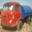

In [5]:
train_x[102]

In [6]:
# (b, g, r) = train_x[102][0][0]
# print(f"R = {r}, G = {g}, B = {b}")

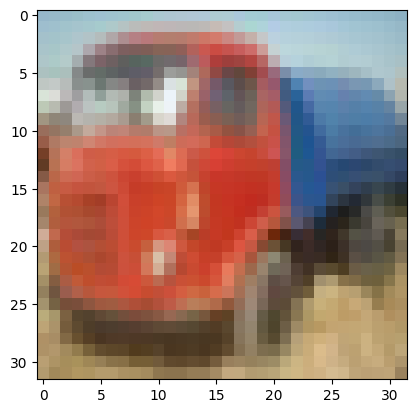

In [7]:
plt.imshow(train_x[102])
plt.show()

## Data Pre-processing

Reshape or Flatten the data

In [8]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1)
print (train_x_flatten.shape)

(50000, 3072)


In [9]:
test_x_flatten = test_x.reshape(test_x.shape[0], -1)
print (test_x_flatten.shape)

(10000, 3072)


Scaling the data

In [10]:
train_x = train_x_flatten/255
print(train_x.shape)
print(train_x[102])

(50000, 3072)
[0.58823529 0.71764706 0.79215686 ... 0.60392157 0.50980392 0.36862745]


In [11]:
test_x = test_x_flatten/255
print(test_x.shape)
print(test_x[102])

(10000, 3072)
[0.05882353 0.00392157 0.00392157 ... 0.03921569 0.0745098  0.03921569]


In [12]:
test_y[102]

array([6], dtype=uint8)

One hot encoding

In [13]:
train_y

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
train_y = to_categorical(train_y, num_classes=10)
test_y = to_categorical(test_y, num_classes=10)

In [16]:
print(train_y.shape)
print(test_y.shape)

(50000, 10)
(10000, 10)


## Modeling

##### check

In [17]:
from numpy.random import seed
seed(1)

tf.random.set_seed(2)

In [18]:
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

In [19]:
train_x_flatten.shape[1]

3072

#### Starting with a basic model

In [23]:
model = Sequential()

model.add(Input(shape=(train_x_flatten.shape[1],)))

model.add(Dense(512, activation='relu'))  # Hidden layer
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax')) # Output layer

In [24]:
my_learning_rate = 0.0001
opt = Adam(learning_rate=my_learning_rate)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(train_x, train_y, epochs=50, verbose=True, batch_size=64)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1513 - loss: 2.2506
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2417 - loss: 2.0081
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2747 - loss: 1.9417
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3009 - loss: 1.8972
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3155 - loss: 1.8608
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3307 - loss: 1.8307
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3414 - loss: 1.7999
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3482 - loss: 1.7800
Epoch 9/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3604 - loss: 1.7592
Epoch 10/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3664 - loss: 1.7396
Epoch 11/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3739 - loss: 1.7220
Epoch 12/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/ste

In [26]:
results = model.evaluate(test_x, test_y, verbose=True)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5313 - loss: 1.3395


In [27]:
print("\n\nAccuracy on training set is {}".format(history.history["accuracy"][-1]))
print("\nAccuracy on test set is {}".format(results[1]))



Accuracy on training set is 0.5266000032424927

Accuracy on test set is 0.5256999731063843


Loss Plot

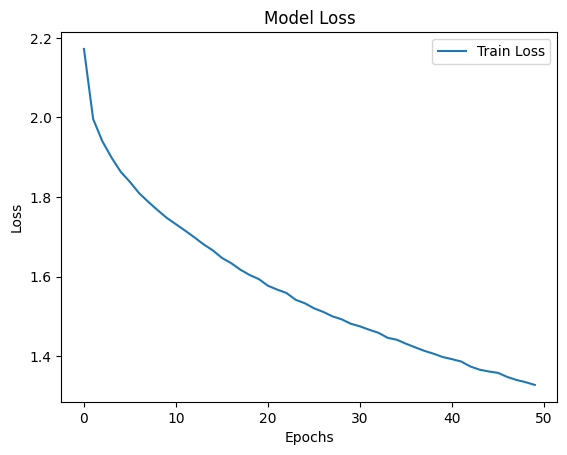

In [29]:
plt.plot(history.history['loss'], label='Train Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Accuracy Plot

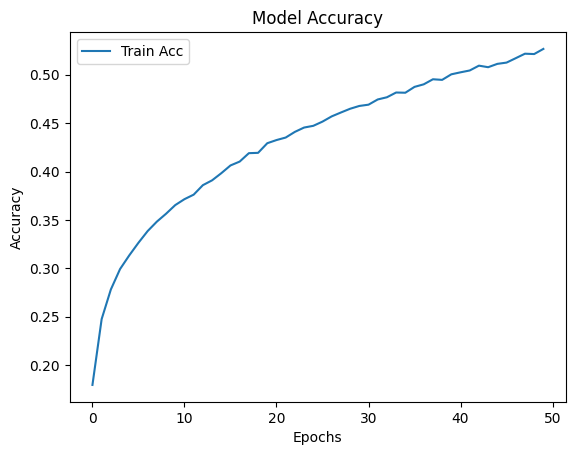

In [30]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


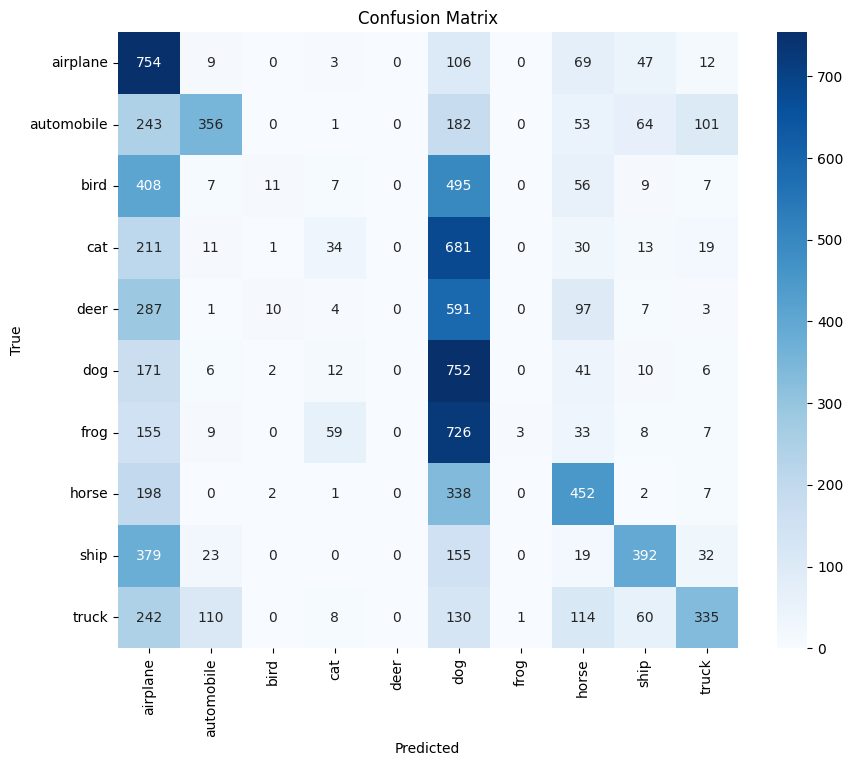

In [32]:
# Predict and convert to labels
y_pred = np.argmax(model.predict(test_x_flatten), axis=1)
y_true = np.argmax(test_y, axis=1)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'],
            yticklabels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix')
plt.show()

In [33]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_true, y_pred, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]))

              precision    recall  f1-score   support

    airplane       0.25      0.75      0.37      1000
  automobile       0.67      0.36      0.46      1000
        bird       0.42      0.01      0.02      1000
         cat       0.26      0.03      0.06      1000
        deer       0.00      0.00      0.00      1000
         dog       0.18      0.75      0.29      1000
        frog       0.75      0.00      0.01      1000
       horse       0.47      0.45      0.46      1000
        ship       0.64      0.39      0.49      1000
       truck       0.63      0.34      0.44      1000

    accuracy                           0.31     10000
   macro avg       0.43      0.31      0.26     10000
weighted avg       0.43      0.31      0.26     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
